In [109]:
import pandas as pd
import numpy as np
from datetime import datetime
import os
from simulation import Simulation
from glob import glob
from matplotlib import pyplot as plt
from matplotlib import ticker

In [110]:
data_files = sorted(glob('../../outputs/numpy_arrays/*'))
data_files

['../../outputs/numpy_arrays/np_output_2022-02-24_13-18-31-927452.npy',
 '../../outputs/numpy_arrays/np_output_2022-02-24_13-23-05-733669.npy',
 '../../outputs/numpy_arrays/np_output_2022-02-24_13-37-52-803398.npy',
 '../../outputs/numpy_arrays/np_output_2022-02-24_13-39-55-360164.npy']

In [111]:
arr = np.load(data_files[-1])

In [112]:
arr.shape

(51, 2, 2, 6)

In [113]:
np.sum(arr, axis=(1,2,3))

array([1.95978464e+08, 1.99562231e+08, 2.02383795e+08, 2.05205358e+08,
       2.08026921e+08, 2.10848484e+08, 2.13670047e+08, 2.16491610e+08,
       2.19313174e+08, 2.22134737e+08, 2.22134737e+08, 2.22134737e+08,
       2.22134737e+08, 2.22134737e+08, 2.22134737e+08, 2.22134737e+08,
       2.22134737e+08, 2.22134737e+08, 2.22134737e+08, 2.22134737e+08,
       2.22134737e+08, 2.22134737e+08, 2.22134737e+08, 2.22134737e+08,
       2.22134737e+08, 2.22134737e+08, 2.22134737e+08, 2.22134737e+08,
       2.22134737e+08, 2.22134737e+08, 2.22134737e+08, 2.22134737e+08,
       2.22134737e+08, 2.22134737e+08, 2.22134737e+08, 2.22134737e+08,
       2.22134737e+08, 2.22134737e+08, 2.22134737e+08, 2.22134737e+08,
       2.22134737e+08, 2.22134737e+08, 2.22134737e+08, 2.22134737e+08,
       2.22134737e+08, 2.22134737e+08, 2.22134737e+08, 2.22134737e+08,
       2.22134737e+08, 2.22134737e+08, 2.22134737e+08])

In [114]:
arr_year_smoking_state = np.sum(arr,axis=(1,2))
arr_year_smoking_state.shape

(51, 6)

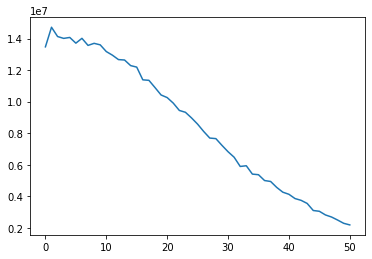

In [115]:
# deaths over time
plt.plot(np.arange(arr_year_smoking_state.shape[0]), arr_year_smoking_state[:,2])

In [116]:
arr_year_smoking_state /= 1e6

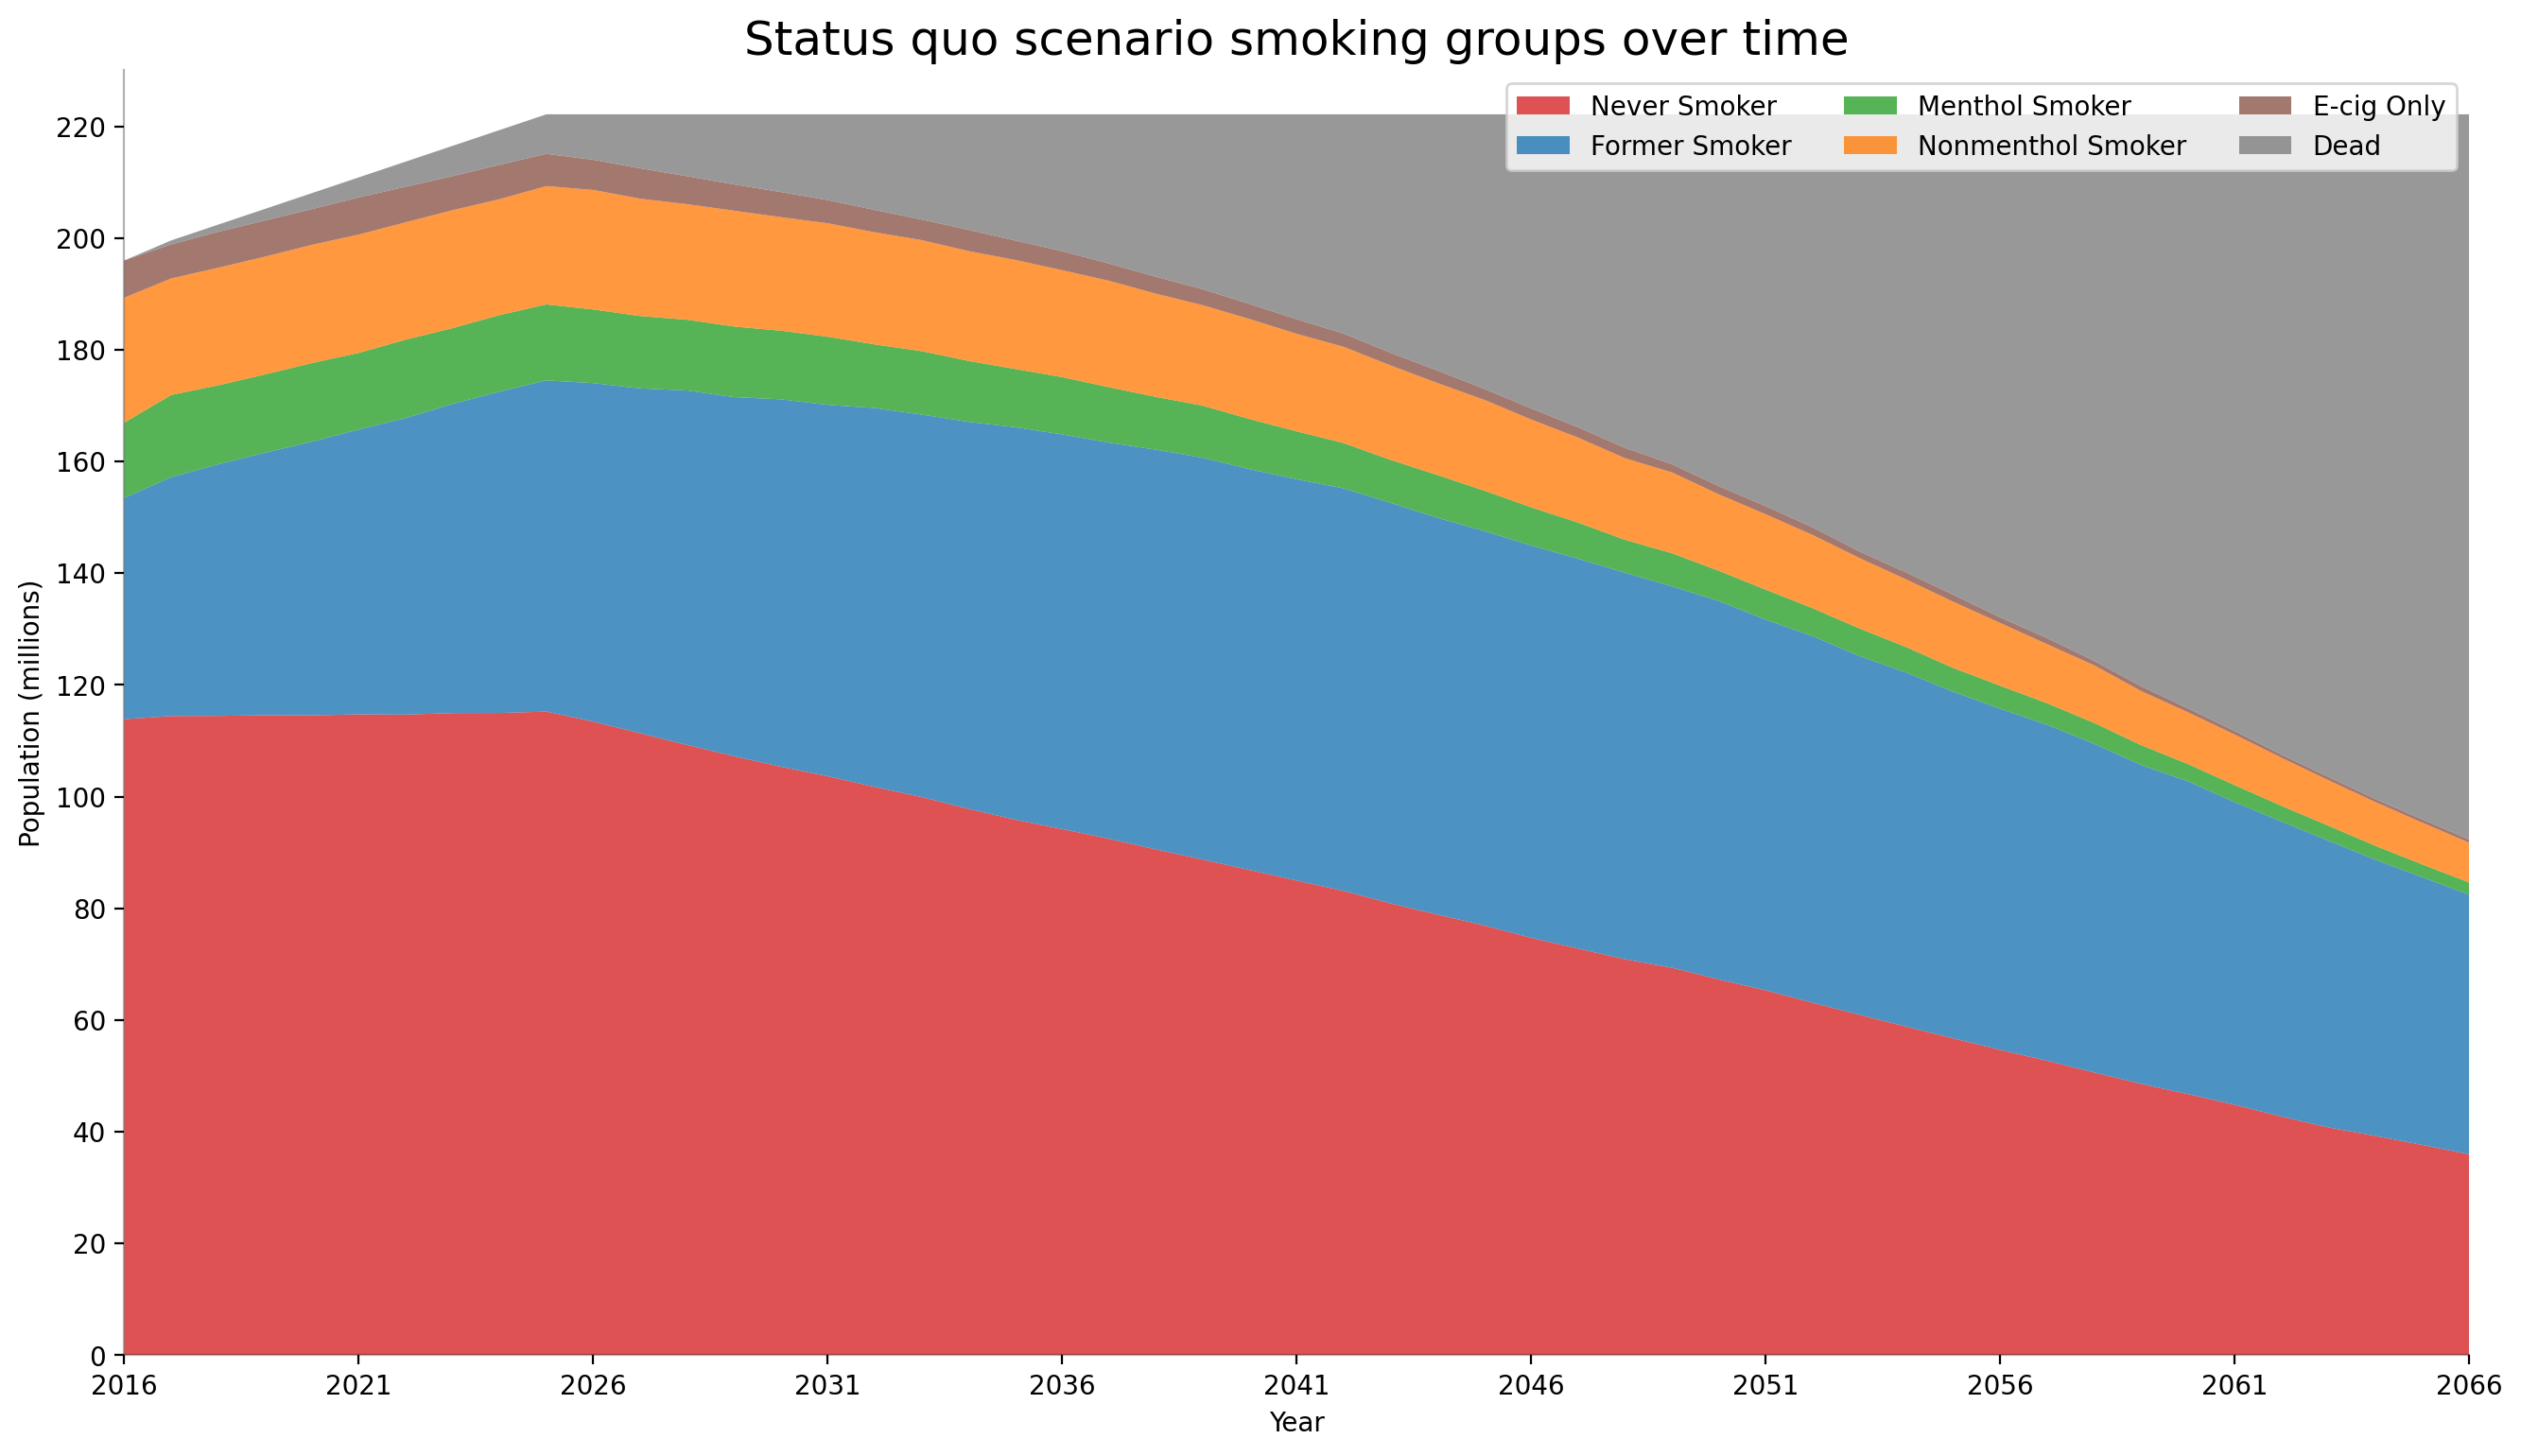

In [117]:
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey',]

fig, ax = plt.subplots(1,1,figsize=(16,9), dpi=200)
labels = ["Never Smoker", "Former Smoker", "Menthol Smoker", "Nonmenthol Smoker", "E-cig Only", "Dead"]

x = np.arange(2016, 2016 + arr_year_smoking_state.shape[0])
y = np.vstack([arr_year_smoking_state[:,i] for i in range(arr_year_smoking_state.shape[1])])

ax = plt.gca()
ax.stackplot(x,y,labels=labels, colors=mycolors, alpha=0.8)

ax.set_title('Status quo scenario smoking groups over time', fontsize=18)
ax.set(ylim=[0, 2.3e2])
ax.legend(fontsize=10, ncol=3)
ax.ticklabel_format(useOffset=False, style='plain')
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(0,2.3e2,2e1,dtype=np.int64), fontsize=10)
plt.xlim(x[0], x[-1])
plt.xlabel("Year")
plt.ylabel("Population (millions)")

plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)


In [118]:
arr_year_smoking_state.shape

(51, 6)

In [119]:
arr_no_dead = arr_year_smoking_state[:,:-1]
arr_no_dead.shape

(51, 5)

In [120]:
arr_no_dead_percents = arr_no_dead / np.sum(arr_no_dead, axis=1).reshape(-1,1) * 100
arr_no_dead_percents[10,:]

array([53.00903534, 28.31132887,  6.15784316,  9.99665958,  2.52513305])

Text(0.5, 1.0, 'Proportion of smoking groups in the living population')

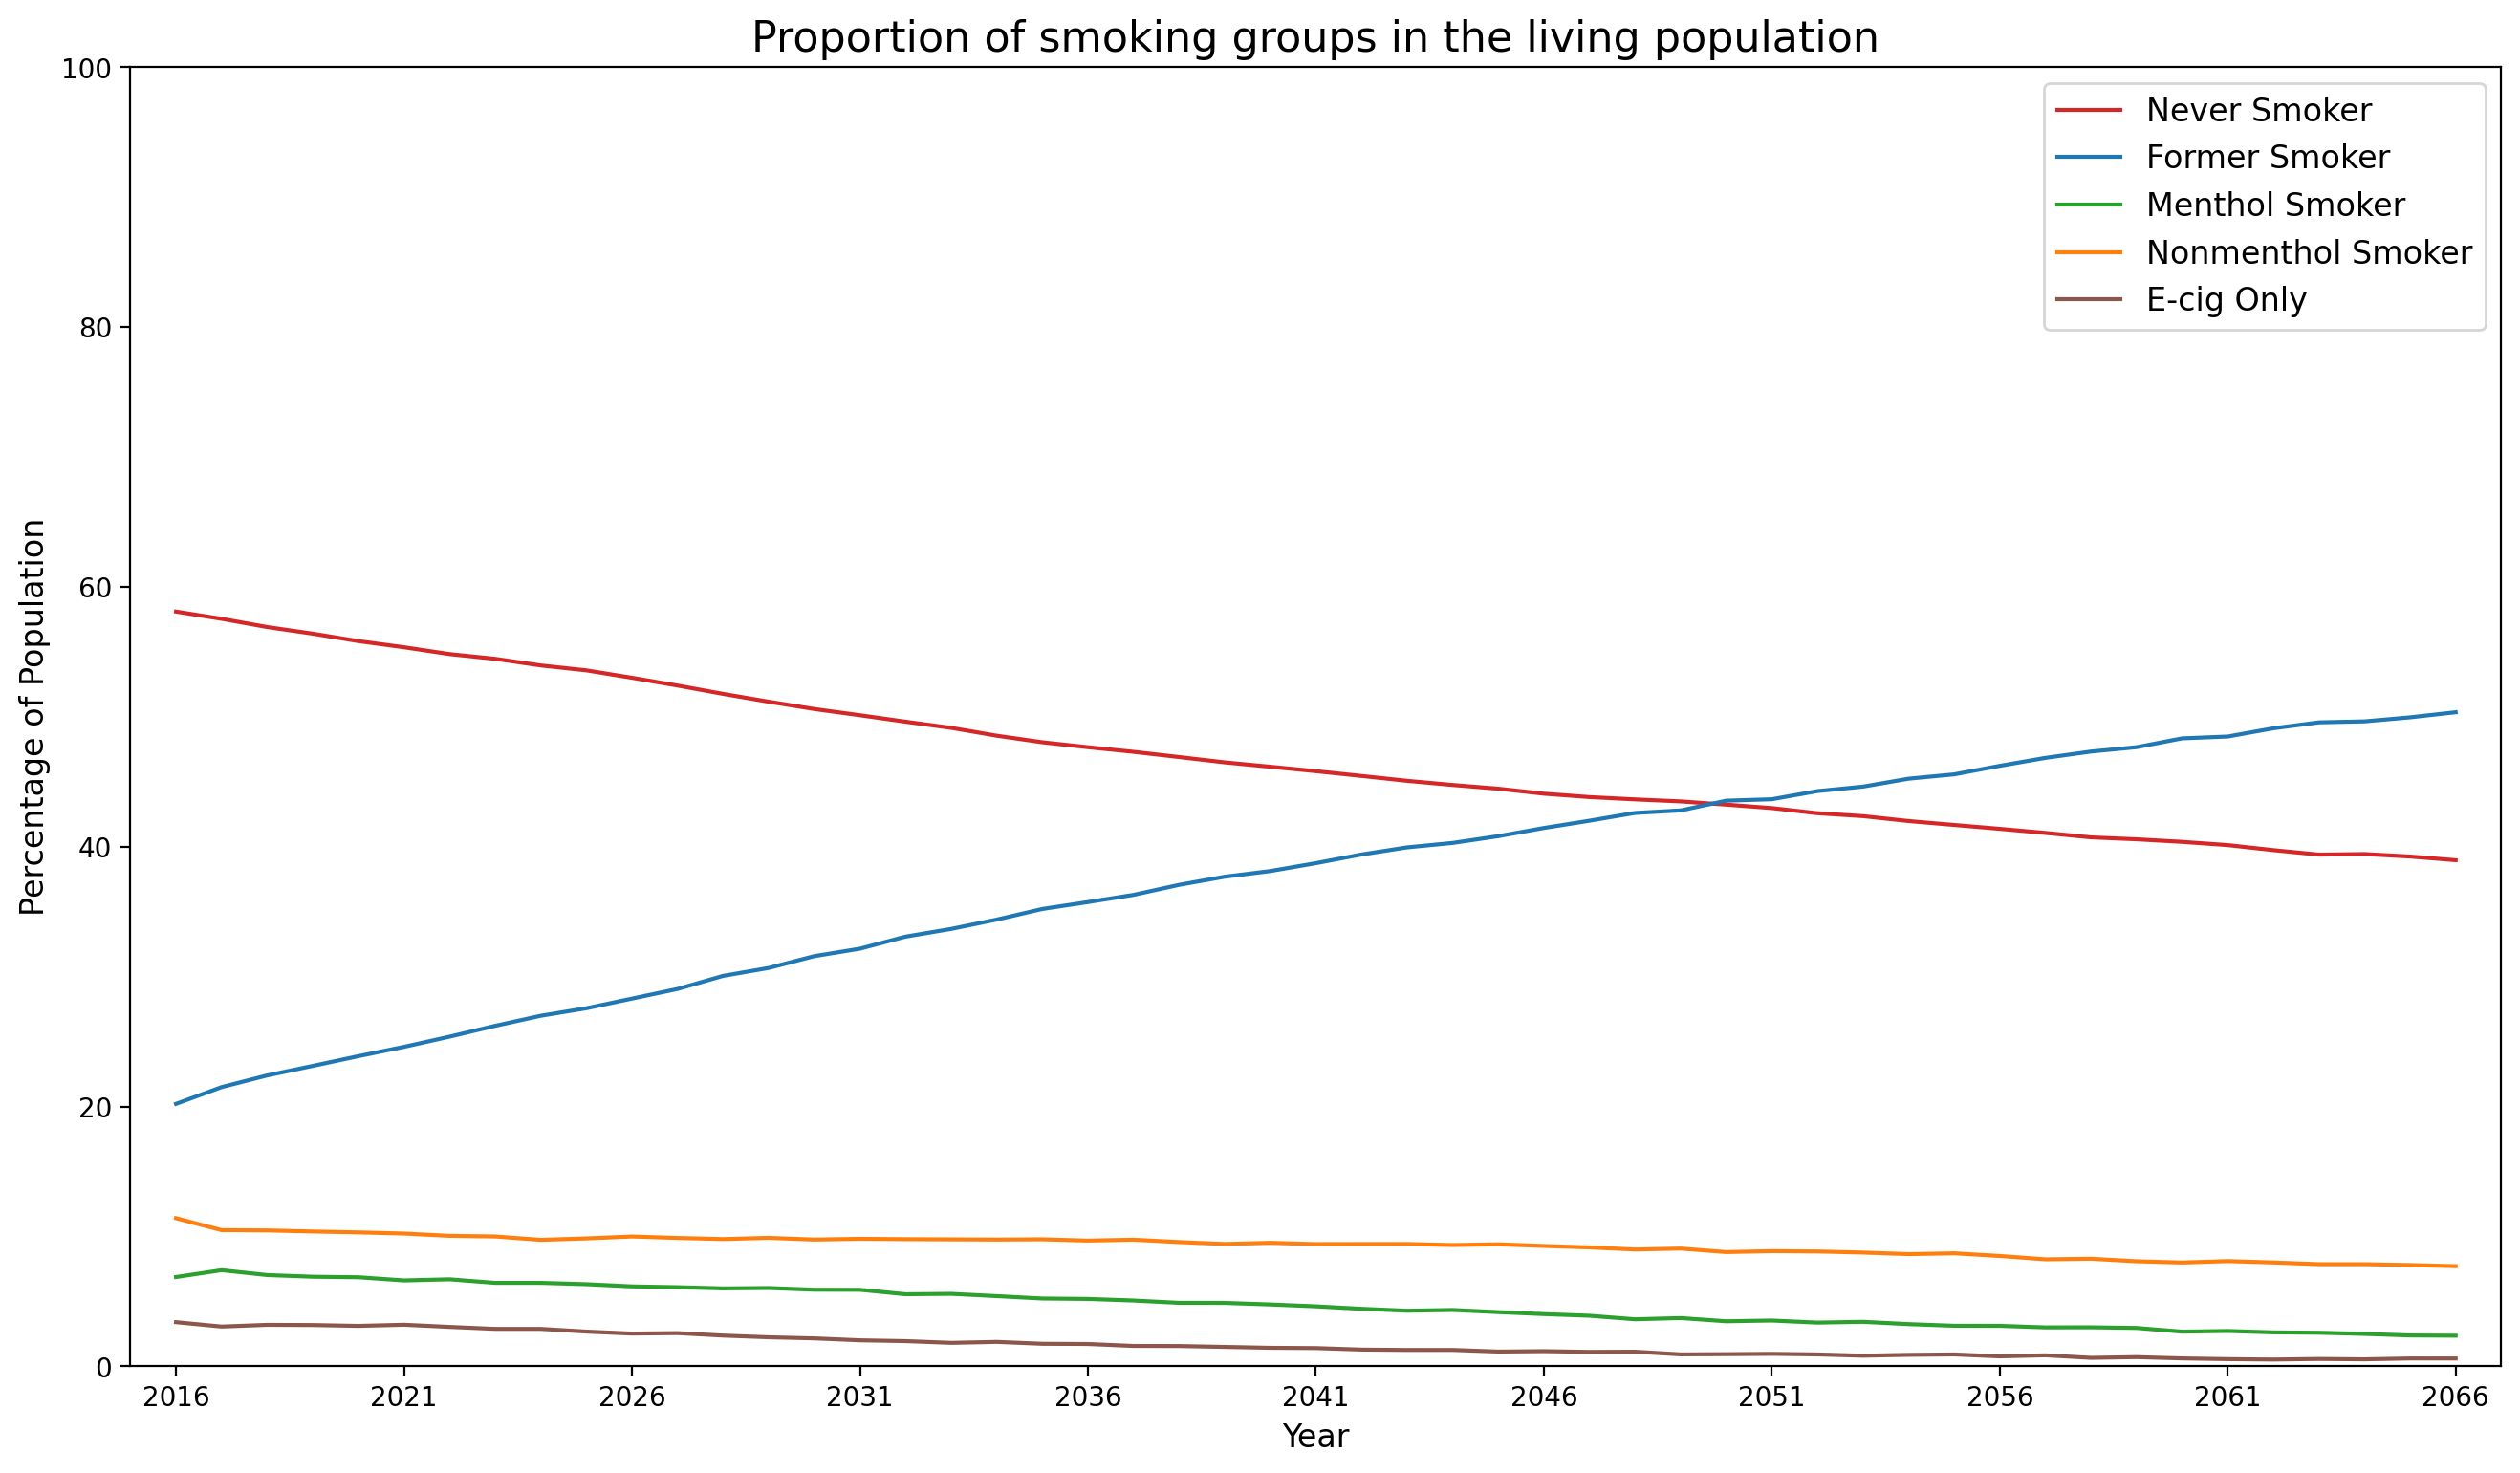

In [121]:
fig, ax = plt.subplots(1,1,figsize=(16,9), dpi=200)
ax.plot(x, arr_no_dead_percents[:,0], mycolors[0],
        x, arr_no_dead_percents[:,1], mycolors[1],
        x, arr_no_dead_percents[:,2], mycolors[2],
        x, arr_no_dead_percents[:,3], mycolors[3],
        x, arr_no_dead_percents[:,4], mycolors[4])

plt.ylim(0,100)
plt.xlim(x[0]-1, x[-1]+1)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage of Population", fontsize=12)
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
ax.legend(labels, fontsize=12, ncol=1)

plt.title("Proportion of smoking groups in the living population", fontsize=16)

# for i in range(len(mycolors)-1):
#         ax.get_lines()[i].set_color(mycolors[i])

# len(ax.get_lines())
# len(mycolors)